In [1]:
# Test migration history reconstruction on simulated data

import sys
import os

repo_dir = "/Users/divyakoyyalagunta/Desktop/Cornell_Research/Morris_Lab/met_history_prediction/"
os.chdir(repo_dir)

from src.lib import vertex_labeling

from src.util import machina_data_extraction_util as mach_util
from src.util import vertex_labeling_util as vert_util
import matplotlib
import torch

HOADLEY_DATA_DIR = os.path.join(repo_dir, 'src/data/hoadley_breast_cancer_2016')


CUDA GPU: False
CUDA GPU: False
CUDA GPU: False


In [2]:

def find_labeling(tree_fn, ref_var_fn, custom_colors):    
    ref_matrix, var_matrix, unique_sites, cluster_label_to_idx = mach_util.get_ref_var_matrices_from_real_data(ref_var_fn)
    print(cluster_label_to_idx)
   
    tree, pruned_cluster_label_to_idx = mach_util.get_adj_matrix_from_machina_tree(cluster_label_to_idx, tree_fn, skip_polytomies=False)

    T = torch.tensor(tree, dtype = torch.float32)
    B = vert_util.get_mutation_matrix_tensor(T)
    
    idx_to_label = {v:k for k,v in pruned_cluster_label_to_idx.items()}
    print(idx_to_label)

    print(unique_sites)   
    primary_idx = unique_sites.index('breast')
    r = torch.nn.functional.one_hot(torch.tensor([primary_idx]), num_classes=len(unique_sites)).T
#     weights = vertex_labeling.Weights(data_fit=0.1, mig=10.0, comig=5.0, seed_site=1.0, reg=0.8, gen_dist=0.0)

#     vertex_labeling.gumbel_softmax_optimization(T, ref_matrix, var_matrix, B, ordered_sites=unique_sites, 
#                                                 weights=weights, p=r, node_idx_to_label=idx_to_label, 
#                                                 max_iter=150, batch_size=64,
#                                                 custom_colors=custom_colors, primary="breast", show_top_trees=False)
    
    weights = vertex_labeling.Weights(data_fit=1.0, mig=10.0, comig=5.0, seed_site=1.0, reg=1.0, gen_dist=0.0)
    vertex_labeling.gumbel_softmax_optimization(T, ref_matrix, var_matrix, B, ordered_sites=unique_sites, 
                                                weights=weights, p=r, node_idx_to_label=idx_to_label,
                                                batch_size=32, init_temp=30, final_temp=0.01, 
                                                custom_colors=custom_colors, primary="breast", show_top_trees=False, 
                                                visualize_intermediates=False, verbose=True)


        

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: '10'}
['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']
X torch.Size([32, 6, 9]) tensor([[[0.9740, 0.3981, 0.5157,  ..., 0.0388, 0.4949, 0.1126],
         [0.6344, 0.3197, 0.4241,  ..., 0.6404, 0.1691, 0.2081],
         [0.7007, 0.8656, 0.0170,  ..., 0.4534, 0.6350, 0.5478],
         [0.5103, 0.9049, 0.3581,  ..., 0.4678, 0.3683, 0.1685],
         [0.3923, 0.0981, 0.7050,  ..., 0.4052, 0.1377, 0.1102],
         [0.0526, 0.5080, 0.0473,  ..., 0.5252, 0.3813, 0.3969]],

        [[0.4971, 0.0913, 0.0466,  ..., 0.6215, 0.3714, 0.5503],
         [0.7946, 0.6645, 0.1812,  ..., 0.5171, 0.2549, 0.2517],
         [0.4795, 0.6270, 0.6852,  ..., 0.1316, 0.3433, 0.1574],
         [0.6851, 0.4211, 0.6605,  ..., 0.3381, 0.6482, 0.0282],
         [0.1612, 0.8720, 0.6323,  ..., 0.1892, 0.8373, 0.5096],
         [0.7349, 0.3475, 0.1084,  ..., 

16:00:35 DEBUG
Loaded backend module://ipykernel.pylab.backend_inline version unknown.
16:00:35 DEBUG
Loaded backend module://ipykernel.pylab.backend_inline version unknown.


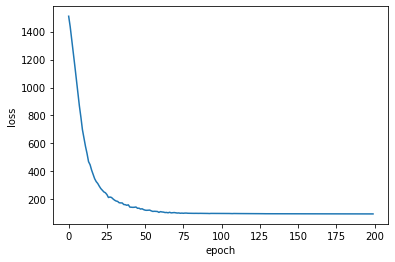

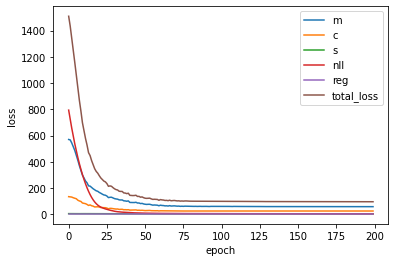

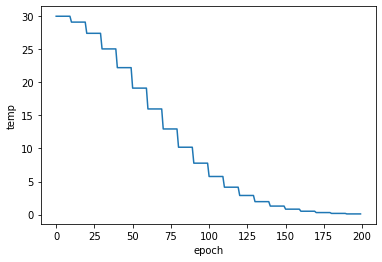

16:00:35 DEBUG

U > 0.05

16:00:35 DEBUG
        norm     1     2     3     4     5     6     7     8     9    10
breast 0.476 0.516 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
brain  0.343 0.000 0.000 0.000 0.264 0.000 0.000 0.000 0.000 0.000 0.361
kidney 0.572 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.401 0.000 0.000
liver  0.147 0.000 0.000 0.064 0.000 0.406 0.000 0.000 0.000 0.374 0.000
lung   0.305 0.000 0.000 0.000 0.000 0.000 0.000 0.595 0.000 0.000 0.000
rib    0.279 0.000 0.000 0.000 0.000 0.000 0.704 0.000 0.000 0.000 0.000
16:00:35 DEBUG

F_hat
16:00:35 DEBUG
tensor([[0.9919, 0.5164, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.9673, 0.6247, 0.0000, 0.0000, 0.6247, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.3608],
        [0.9733, 0.4015, 0.4015, 0.4015, 0.0000, 0.4015, 0.0000, 0.0000, 0.4015,
         0.0000, 0.0000],
        [0.9915, 0.8445, 0.8445, 0.8445, 0.0000, 0.7805, 0.0000, 0.0000, 0.0000,
         

****************************** BEST TREE ******************************

Migration number: 5.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 3.527
Reg: 6.0
Loss: 87.527


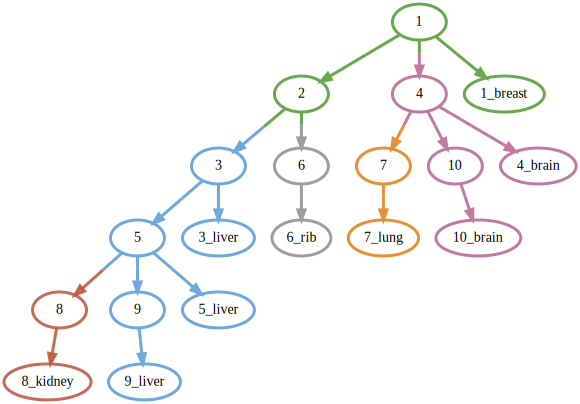

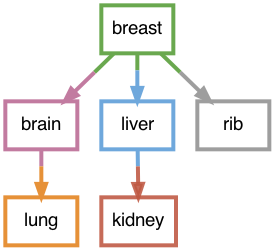

Time elapsed: 10.109101


In [3]:
# Patient A7, tree 1 (reported)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'hotpink', 'saddlebrown', 'royalblue', 'darkorange', 'grey']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(HOADLEY_DATA_DIR, "A7/A7.1.tree"), os.path.join(HOADLEY_DATA_DIR, "A7/A7_MACHINA_0.95.tsv"), custom_colors)



{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, '10': 9}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9', 9: '10'}
['breast', 'brain', 'kidney', 'liver', 'lung', 'rib']
X torch.Size([32, 6, 9]) tensor([[[0.9593, 0.8649, 0.9139,  ..., 0.6894, 0.6902, 0.6491],
         [0.2990, 0.4765, 0.0164,  ..., 0.6078, 0.3796, 0.6525],
         [0.3925, 0.5850, 0.5059,  ..., 0.0742, 0.7600, 0.0489],
         [0.8584, 0.3571, 0.8481,  ..., 0.6655, 0.0691, 0.1438],
         [0.8390, 0.2321, 0.1559,  ..., 0.4849, 0.1422, 0.6126],
         [0.8373, 0.4223, 0.4907,  ..., 0.8497, 0.6217, 0.4677]],

        [[0.4622, 0.2790, 0.1167,  ..., 0.3717, 0.1797, 0.8992],
         [0.8078, 0.2382, 0.7017,  ..., 0.5250, 0.1943, 0.6029],
         [0.5550, 0.5901, 0.6013,  ..., 0.4581, 0.7974, 0.6780],
         [0.8929, 0.0501, 0.7123,  ..., 0.8298, 0.4562, 0.1131],
         [0.4664, 0.8454, 0.4785,  ..., 0.2116, 0.6925, 0.4359],
         [0.7707, 0.5306, 0.9454,  ..., 

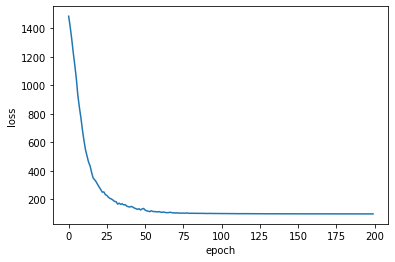

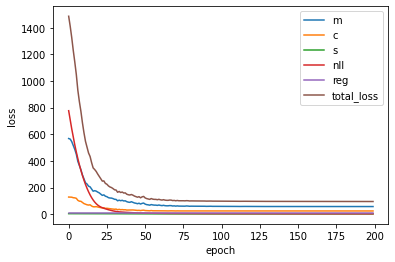

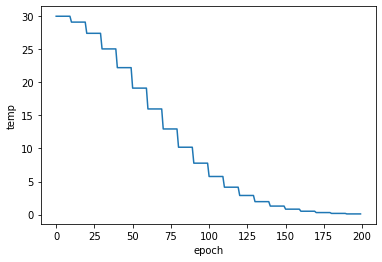

16:00:45 DEBUG

U > 0.05

16:00:45 DEBUG
        norm     1     2     3     4     5     6     7     8     9    10
breast 0.476 0.516 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
brain  0.342 0.000 0.000 0.000 0.262 0.000 0.000 0.000 0.000 0.000 0.361
kidney 0.572 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.401 0.000 0.000
liver  0.149 0.000 0.000 0.464 0.000 0.000 0.000 0.000 0.000 0.375 0.000
lung   0.305 0.000 0.000 0.000 0.000 0.000 0.000 0.598 0.000 0.000 0.000
rib    0.279 0.000 0.000 0.000 0.000 0.000 0.705 0.000 0.000 0.000 0.000
16:00:45 DEBUG

F_hat
16:00:45 DEBUG
tensor([[0.9912, 0.5156, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000],
        [0.9649, 0.6226, 0.0000, 0.0000, 0.6226, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.3611],
        [0.9724, 0.4008, 0.4008, 0.4008, 0.0000, 0.4008, 0.0000, 0.0000, 0.4008,
         0.0000, 0.0000],
        [0.9875, 0.8389, 0.8389, 0.8389, 0.0000, 0.8389, 0.0000, 0.0000, 0.0000,
         

****************************** BEST TREE ******************************

Migration number: 5.0
Comigration number: 5.0
Seeding site number: 3.0
Neg log likelihood: 3.749
Reg: 6.0
Loss: 87.749


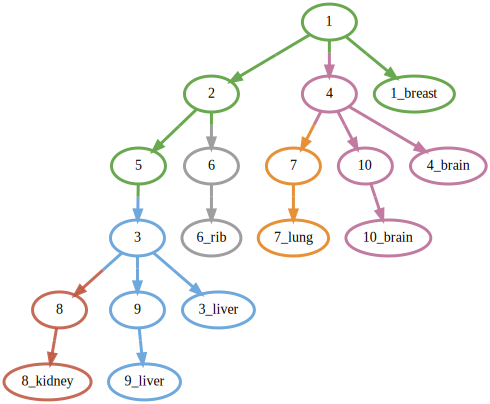

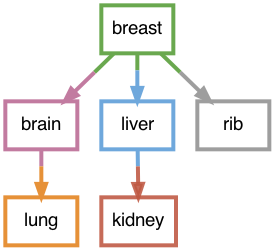

Time elapsed: 9.815053


In [4]:
# Patient A7, tree 2 (inferred by SPRUCE)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['limegreen', 'hotpink', 'saddlebrown', 'royalblue', 'darkorange', 'grey']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(HOADLEY_DATA_DIR, "A7/A7.2.tree"), os.path.join(HOADLEY_DATA_DIR, "A7/A7_MACHINA_0.95.tsv"), custom_colors)



{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9'}
['breast', 'adrenal', 'liver', 'lung', 'spinal']
X torch.Size([32, 5, 8]) tensor([[[0.7045, 0.7089, 0.2756,  ..., 0.0437, 0.4945, 0.5630],
         [0.6233, 0.1805, 0.6649,  ..., 0.4075, 0.4661, 0.4283],
         [0.5874, 0.4963, 0.3609,  ..., 0.4488, 0.5662, 0.9021],
         [0.5212, 0.2305, 0.7855,  ..., 0.4608, 0.2689, 0.0548],
         [0.1695, 0.5833, 0.2287,  ..., 0.1153, 0.4621, 0.9106]],

        [[0.0617, 0.0539, 0.7940,  ..., 0.3617, 0.3896, 0.7556],
         [0.5461, 0.7586, 0.1404,  ..., 0.7947, 0.0595, 0.7305],
         [0.1806, 0.6223, 0.7456,  ..., 0.5830, 0.6290, 0.7193],
         [0.1334, 0.1648, 0.3972,  ..., 0.4073, 0.7843, 0.2018],
         [0.3828, 0.4989, 0.9269,  ..., 0.4126, 0.9186, 0.5465]],

        [[0.6917, 0.1900, 0.6190,  ..., 0.0185, 0.3918, 0.9632],
         [0.1177, 0.4997, 0.7999,  ..., 0.1048, 0.9560, 0.365

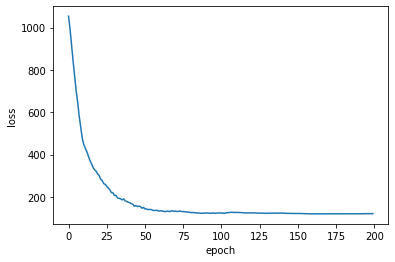

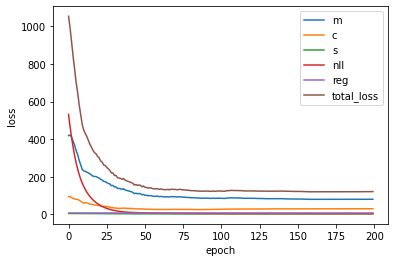

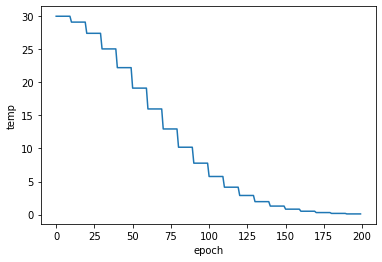

16:00:55 DEBUG

U > 0.05

16:00:55 DEBUG
         norm     1     2     3     4     5     6     7     8     9
breast  0.401 0.000 0.000 0.000 0.000 0.000 0.000 0.053 0.404 0.000
adrenal 0.185 0.000 0.345 0.000 0.000 0.000 0.429 0.000 0.000 0.000
liver   0.106 0.000 0.386 0.000 0.000 0.000 0.000 0.442 0.000 0.000
lung    0.594 0.075 0.000 0.000 0.000 0.266 0.000 0.000 0.000 0.000
spinal  0.572 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.371
16:00:55 DEBUG

F_hat
16:00:55 DEBUG
tensor([[0.8580, 0.4568, 0.0530, 0.4037, 0.0530, 0.4037, 0.0000, 0.0530, 0.4037,
         0.0000],
        [0.9595, 0.7740, 0.7740, 0.0000, 0.4293, 0.0000, 0.4293, 0.0000, 0.0000,
         0.0000],
        [0.9342, 0.8285, 0.8285, 0.0000, 0.4420, 0.0000, 0.0000, 0.4420, 0.0000,
         0.0000],
        [0.9349, 0.3412, 0.0000, 0.2662, 0.0000, 0.2662, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.9425, 0.3705, 0.0000, 0.3705, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.3705]])
16:00:55 DEBUG
run

****************************** BEST TREE ******************************

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 3.393
Reg: 5.0
Loss: 105.393


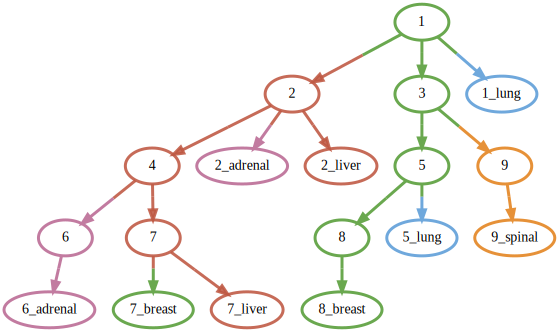

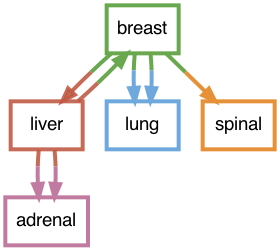

Time elapsed: 9.647153


In [5]:
# Patient A1, tree 1 (reported)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['green', 'red', 'royalblue', 'darkorange', 'purple']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(HOADLEY_DATA_DIR, "A1/A1.1.tree"), os.path.join(HOADLEY_DATA_DIR, "A1/A1_MACHINA_0.95.tsv"), custom_colors)


{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9'}
['breast', 'adrenal', 'liver', 'lung', 'spinal']
X torch.Size([32, 5, 8]) tensor([[[0.0567, 0.8815, 0.7490,  ..., 0.0340, 0.3032, 0.5726],
         [0.6891, 0.2300, 0.6293,  ..., 0.5310, 0.8830, 0.4010],
         [0.9620, 0.7405, 0.4471,  ..., 0.6884, 0.2087, 0.4615],
         [0.5154, 0.4447, 0.9387,  ..., 0.0572, 0.5709, 0.5464],
         [0.4834, 0.1188, 0.7813,  ..., 0.2669, 0.1293, 0.1000]],

        [[0.7452, 0.7119, 0.0499,  ..., 0.1564, 0.7836, 0.7893],
         [0.5113, 0.8213, 0.0620,  ..., 0.8778, 0.3076, 0.6868],
         [0.5911, 0.2051, 0.5129,  ..., 0.2922, 0.9381, 0.4108],
         [0.4917, 0.0684, 0.7291,  ..., 0.7450, 0.5775, 0.8214],
         [0.0615, 0.3721, 0.7634,  ..., 0.6432, 0.5233, 0.4356]],

        [[0.4875, 0.0472, 0.0868,  ..., 0.4518, 0.9420, 0.9374],
         [0.0098, 0.2622, 0.9984,  ..., 0.8587, 0.0590, 0.125

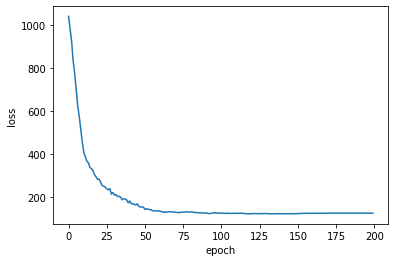

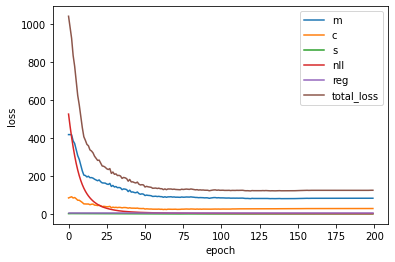

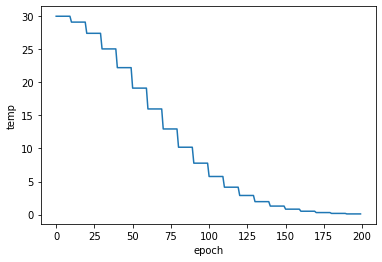

16:01:05 DEBUG

U > 0.05

16:01:05 DEBUG
         norm     1     2     3     4     5     6     7     8     9
breast  0.403 0.000 0.000 0.000 0.061 0.000 0.000 0.051 0.408 0.000
adrenal 0.189 0.000 0.344 0.000 0.000 0.000 0.427 0.000 0.000 0.000
liver   0.078 0.000 0.000 0.000 0.484 0.000 0.000 0.415 0.000 0.000
lung    0.589 0.083 0.000 0.000 0.000 0.270 0.000 0.000 0.000 0.000
spinal  0.573 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.371
16:01:05 DEBUG

F_hat
16:01:05 DEBUG
tensor([[0.9235, 0.5203, 0.1124, 0.4079, 0.0614, 0.4079, 0.0000, 0.0510, 0.4079,
         0.0000],
        [0.9598, 0.7710, 0.7710, 0.0000, 0.4273, 0.0000, 0.4273, 0.0000, 0.0000,
         0.0000],
        [0.9767, 0.8989, 0.8989, 0.0000, 0.4837, 0.0000, 0.0000, 0.4153, 0.0000,
         0.0000],
        [0.9423, 0.3528, 0.0000, 0.2702, 0.0000, 0.2702, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.9447, 0.3713, 0.0000, 0.3713, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.3713]])
16:01:05 DEBUG
run

****************************** BEST TREE ******************************

Migration number: 8.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 3.508
Reg: 4.999999523162842
Loss: 115.508


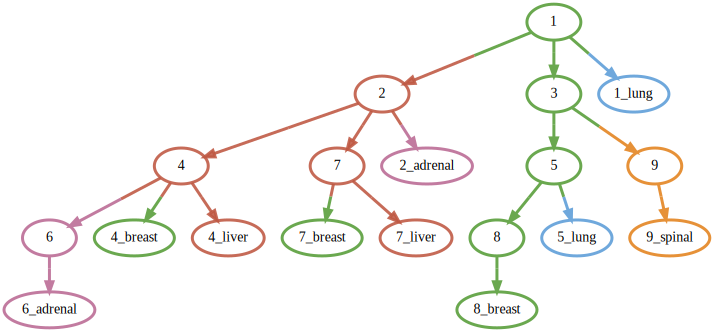

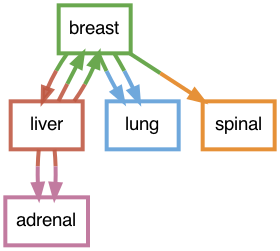

Time elapsed: 9.774072


In [6]:
# Patient A1, tree 2 (reported)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['green', 'red', 'royalblue', 'darkorange', 'purple']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(HOADLEY_DATA_DIR, "A1/A1.2.tree"), os.path.join(HOADLEY_DATA_DIR, "A1/A1_MACHINA_0.95.tsv"), custom_colors)


{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9'}
['breast', 'adrenal', 'liver', 'lung', 'spinal']
X torch.Size([32, 5, 8]) tensor([[[0.2345, 0.6107, 0.1450,  ..., 0.5308, 0.2020, 0.8334],
         [0.5513, 0.6001, 0.5956,  ..., 0.7579, 0.1026, 0.3195],
         [0.2791, 0.3907, 0.2874,  ..., 0.6971, 0.1311, 0.0938],
         [0.3129, 0.4862, 0.7389,  ..., 0.1658, 0.0093, 0.5255],
         [0.2986, 0.1578, 0.5594,  ..., 0.9152, 0.8764, 0.4354]],

        [[0.0113, 0.9434, 0.2645,  ..., 0.5994, 0.8701, 0.8361],
         [0.3429, 0.9482, 0.2542,  ..., 0.0861, 0.2605, 0.7593],
         [0.5245, 0.4227, 0.8067,  ..., 0.7351, 0.1350, 0.8363],
         [0.0588, 0.9729, 0.4745,  ..., 0.1714, 0.7087, 0.0883],
         [0.5933, 0.7092, 0.1784,  ..., 0.4678, 0.7131, 0.4084]],

        [[0.0820, 0.1717, 0.1886,  ..., 0.1397, 0.9082, 0.8693],
         [0.7866, 0.7823, 0.1962,  ..., 0.8835, 0.2178, 0.065

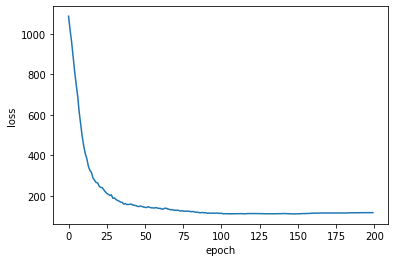

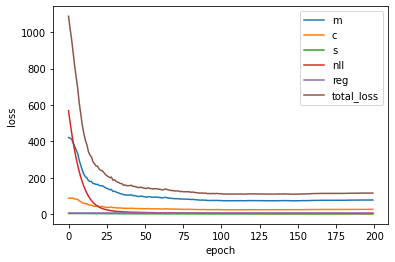

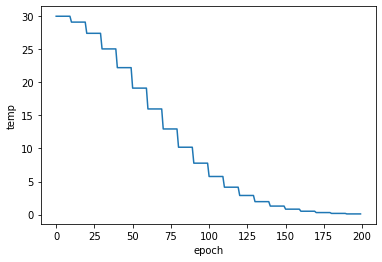

16:01:14 DEBUG

U > 0.05

16:01:14 DEBUG
         norm     1     2     3     4     5     6     7     8     9
breast  0.408 0.000 0.000 0.000 0.063 0.000 0.000 0.000 0.404 0.000
adrenal 0.141 0.000 0.000 0.000 0.445 0.000 0.393 0.000 0.000 0.000
liver   0.052 0.000 0.000 0.000 0.489 0.000 0.000 0.418 0.000 0.000
lung    0.604 0.068 0.000 0.000 0.000 0.271 0.000 0.000 0.000 0.000
spinal  0.584 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.372
16:01:14 DEBUG

F_hat
16:01:14 DEBUG
tensor([[0.8748, 0.4673, 0.0628, 0.4044, 0.0628, 0.4044, 0.0000, 0.0000, 0.4044,
         0.0000],
        [0.9798, 0.8385, 0.8385, 0.0000, 0.4454, 0.0000, 0.3930, 0.0000, 0.0000,
         0.0000],
        [0.9590, 0.9068, 0.9068, 0.0000, 0.4886, 0.0000, 0.0000, 0.4183, 0.0000,
         0.0000],
        [0.9418, 0.3383, 0.0000, 0.2707, 0.0000, 0.2707, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.9558, 0.3722, 0.0000, 0.3722, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.3722]])
16:01:14 DEBUG
run

****************************** BEST TREE ******************************

Migration number: 7.0
Comigration number: 4.0
Seeding site number: 1.0
Neg log likelihood: 3.964
Reg: 4.999999523162842
Loss: 99.964


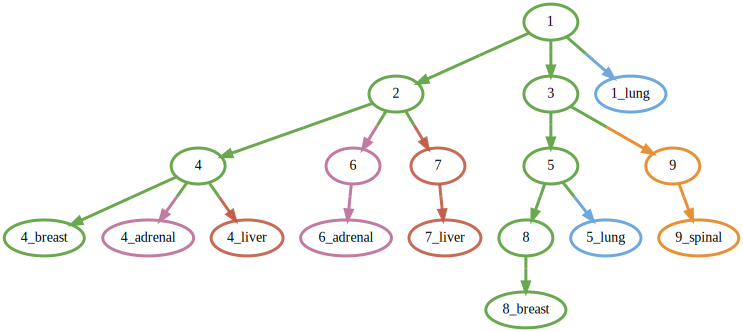

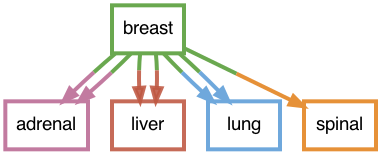

Time elapsed: 9.553119


In [7]:
# Patient A1, tree 3 (inferred by SPRUCE)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['green', 'red', 'royalblue', 'darkorange', 'purple']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(HOADLEY_DATA_DIR, "A1/A1.3.tree"), os.path.join(HOADLEY_DATA_DIR, "A1/A1_MACHINA_0.95.tsv"), custom_colors)


{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8}
{0: '1', 1: '2', 2: '3', 3: '4', 4: '5', 5: '6', 6: '7', 7: '8', 8: '9'}
['breast', 'adrenal', 'liver', 'lung', 'spinal']
X torch.Size([32, 5, 8]) tensor([[[0.7491, 0.6497, 0.0529,  ..., 0.1625, 0.8964, 0.0157],
         [0.8908, 0.0572, 0.1247,  ..., 0.2538, 0.2160, 0.3866],
         [0.4496, 0.2548, 0.3673,  ..., 0.5082, 0.0262, 0.2858],
         [0.3256, 0.8223, 0.5510,  ..., 0.3854, 0.5534, 0.1229],
         [0.6507, 0.3643, 0.3854,  ..., 0.7870, 0.4206, 0.1278]],

        [[0.9490, 0.6059, 0.8460,  ..., 0.1735, 0.2808, 0.0999],
         [0.2087, 0.8933, 0.4343,  ..., 0.2178, 0.6842, 0.0538],
         [0.7307, 0.8237, 0.8171,  ..., 0.8940, 0.9349, 0.7716],
         [0.6698, 0.8790, 0.4995,  ..., 0.7276, 0.2507, 0.1241],
         [0.6069, 0.3914, 0.6019,  ..., 0.9053, 0.0025, 0.3060]],

        [[0.3070, 0.5499, 0.2210,  ..., 0.1111, 0.9114, 0.5614],
         [0.8224, 0.3496, 0.3130,  ..., 0.0970, 0.0965, 0.251

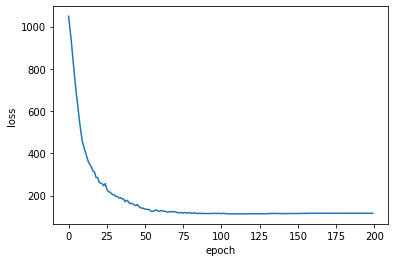

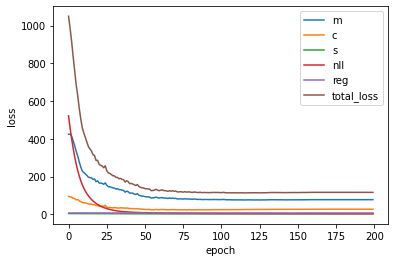

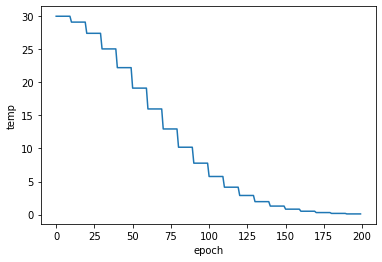

16:01:24 DEBUG

U > 0.05

16:01:24 DEBUG
         norm     1     2     3     4     5     6     7     8     9
breast  0.396 0.000 0.000 0.000 0.000 0.000 0.000 0.052 0.404 0.000
adrenal 0.150 0.000 0.000 0.000 0.444 0.000 0.393 0.000 0.000 0.000
liver   0.098 0.000 0.383 0.000 0.057 0.000 0.000 0.439 0.000 0.000
lung    0.597 0.074 0.000 0.000 0.000 0.269 0.000 0.000 0.000 0.000
spinal  0.582 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.372
16:01:24 DEBUG

F_hat
16:01:24 DEBUG
tensor([[0.8521, 0.4562, 0.0523, 0.4039, 0.0523, 0.4039, 0.0000, 0.0523, 0.4039,
         0.0000],
        [0.9867, 0.8372, 0.8372, 0.0000, 0.4439, 0.0000, 0.3933, 0.0000, 0.0000,
         0.0000],
        [0.9774, 0.8792, 0.8792, 0.0000, 0.4961, 0.0000, 0.0000, 0.4388, 0.0000,
         0.0000],
        [0.9403, 0.3435, 0.0000, 0.2694, 0.0000, 0.2694, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.9534, 0.3715, 0.0000, 0.3715, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.3715]])
16:01:24 DEBUG
run

****************************** BEST TREE ******************************

Migration number: 7.0
Comigration number: 5.0
Seeding site number: 2.0
Neg log likelihood: 3.656
Reg: 4.999999523162842
Loss: 105.656


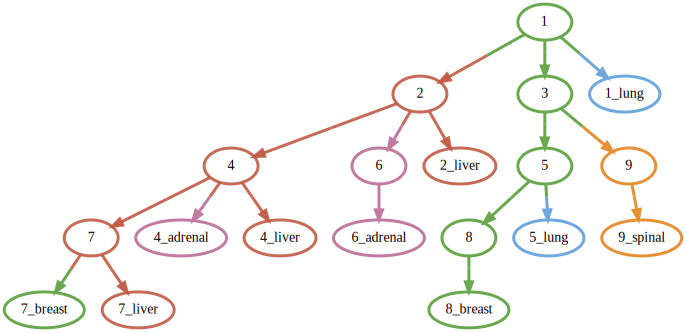

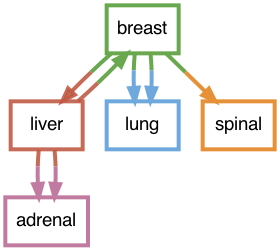

Time elapsed: 9.60788


In [8]:
# Patient A1, tree 4 (inferred by SPRUCE)
custom_colors = [matplotlib.colors.to_hex(c) for c in ['green', 'red', 'royalblue', 'darkorange', 'purple']]
custom_colors = ["#6aa84fff","#c27ba0ff", "#be5742e1", "#6fa8dcff", "#e69138ff", "#9e9e9eff"]

find_labeling(os.path.join(HOADLEY_DATA_DIR, "A1/A1.4.tree"), os.path.join(HOADLEY_DATA_DIR, "A1/A1_MACHINA_0.95.tsv"), custom_colors)
